# Sushmita Pal
## Enrolment id- 0017

#### Dataset

In [3]:
# Name: news_data.csv, sample_news.txt
# Location: https://mitu.co.in/dataset

#### Download the dataset and save in your current working directory

In [2]:
import os
os.getcwd()

'C:\\Users\\spark'

In [3]:
os.listdir(os.getcwd())      # just to check

['.anaconda',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.virtual_documents',
 '1 Information Extraction.ipynb',
 '10Data Analysis using Pandas.ipynb',
 '11 Tokenization.ipynb',
 '12 Web Scarpping.ipynb',
 '13 Stemming.ipynb',
 '14 Lemmatization .ipynb',
 '15 POS Tagging.ipynb',
 '16 Indian Language POS Tagging .ipynb',
 '17 Stopwords.ipynb',
 '18 Sample Application.ipynb',
 '19 Synonyms and Antonyms.ipynb',
 '2 Decision Making and looping.ipynb',
 '2 Text Summarization.ipynb',
 '20 Morphological Analysis.ipynb',
 '23 Computational Linguistics.ipynb',
 '24 Text to Speech Conversion.ipynb',
 '25 Speech to text Conversion.ipynb',
 '26 Grammar Checking.ipynb',
 '3 Data Structures.ipynb',
 '3 Word Sense Disambiguation.ipynb',
 '4 Data Preperation .ipynb',
 '4 Functions.ipynb',
 '5 Machine Learning- Binary Classification.ipynb',
 '5 Modules.ipynb',
 '6 Exception Handling.ipynb',
 '6 Machine Learning - Multi

#### Import the libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Read the dataset

In [5]:
df = pd.read_csv('news_data.csv')

In [6]:
df.shape

(9900, 2)

In [7]:
df.columns # text is input data, label is a output data df is dataframe

Index(['Text', 'label'], dtype='object')

### Seperate the input and output data

In [8]:
features = df['Text']  # input data
label = df['label']    # output data

In [9]:
features.head()

0     Top Trump Surrogate BRUTALLY Stabs Him In The...
1    U.S. conservative leader optimistic of common ...
2    Trump proposes U.S. tax overhaul, stirs concer...
3     Court Forces Ohio To Allow Millions Of Illega...
4    Democrats say Trump agrees to work on immigrat...
Name: Text, dtype: object

In [10]:
label

0       Fake
1       Real
2       Real
3       Fake
4       Real
        ... 
9895    Fake
9896    Real
9897    Real
9898    Fake
9899    Fake
Name: label, Length: 9900, dtype: object

In [11]:
set(label)

{'Fake', 'Real'}

<Axes: xlabel='label', ylabel='count'>

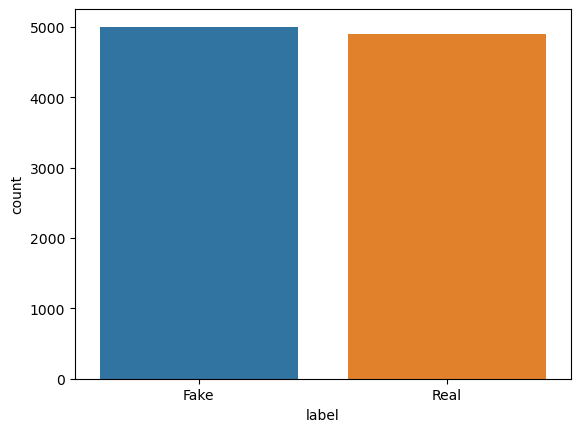

In [12]:
sns.countplot(x = label)

In [13]:
label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

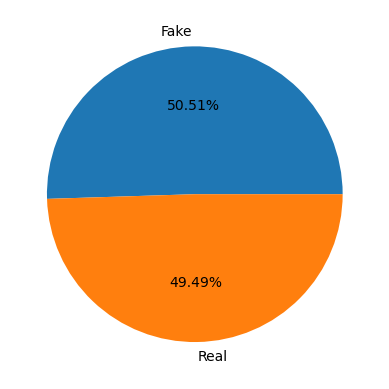

In [14]:
plt.pie(label.value_counts(), labels = label.value_counts().index, autopct= '%2.2f%%');

### Data Preparation

#### Data Cleaning

In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [16]:
# for demonstration
sent = ' Hello friends! How are you? I like Python Programming.'

In [17]:
# Tokenize
tokens1 = word_tokenize(sent)

In [18]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [19]:
# remove punctuations
tokens2 = [x for x in tokens1 if x.isalpha()]

In [20]:
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [21]:
# remove stopwords
swords = stopwords.words('english')

In [22]:
swords  # if these in list(tokens) then dont print

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
tokens3 = [x for x in tokens2 if x not in swords]

In [24]:
tokens3

['Hello', 'friends', 'How', 'I', 'like', 'Python', 'Programming']

In [25]:
# remove suffixes
ps = PorterStemmer()

In [26]:
tokens4 = [ps.stem(x) for x in tokens3]

In [27]:
tokens4

['hello', 'friend', 'how', 'i', 'like', 'python', 'program']

In [28]:
# define a function for text cleaning
def clean_text (sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

In [29]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [30]:
new_sent = 'It was the expected result. They told the same on fields.'

In [31]:
clean_text(new_sent)

['expect', 'result', 'told', 'field']

In [32]:
features

0        Top Trump Surrogate BRUTALLY Stabs Him In The...
1       U.S. conservative leader optimistic of common ...
2       Trump proposes U.S. tax overhaul, stirs concer...
3        Court Forces Ohio To Allow Millions Of Illega...
4       Democrats say Trump agrees to work on immigrat...
                              ...                        
9895     Wikileaks Admits To Screwing Up IMMENSELY Wit...
9896    Trump consults Republican senators on Fed chie...
9897    Trump lawyers say judge lacks jurisdiction for...
9898     WATCH: Right-Wing Pastor Falsely Credits Trum...
9899     Sean Spicer HILARIOUSLY Branded As Chickensh*...
Name: Text, Length: 9900, dtype: object

In [33]:
clean_text(features[123])          # taking random feature 

['rank',
 'dem',
 'hous',
 'russia',
 'probe',
 'explos',
 'news',
 'trump',
 'run',
 'scare',
 'everybodi',
 'still',
 'believ',
 'democraci',
 'true',
 'freedom',
 'reel',
 'fbi',
 'director',
 'jame',
 'comey',
 'fire',
 'media',
 'member',
 'congress',
 'frantic',
 'work',
 'get',
 'deet',
 'happen',
 'adam',
 'schiff',
 'rank',
 'member',
 'hous',
 'intellig',
 'committe',
 'conduct',
 'investig',
 'russia',
 'drop',
 'truth',
 'bomb',
 'comey',
 'trump',
 'would',
 'wise',
 'go',
 'find',
 'cave',
 'hide',
 'ask',
 'cnn',
 'whether',
 'believ',
 'think',
 'someth',
 'wors',
 'brazen',
 'interfer',
 'crimin',
 'investig',
 'presid',
 'call',
 'whole',
 'investig',
 'fake',
 'fbi',
 'director',
 'serious',
 'look',
 'whether',
 'trump',
 'associ',
 'collud',
 'russian',
 'end',
 'statement',
 'cnn',
 'particularli',
 'jar',
 'anybodi',
 'familiar',
 'histori',
 'watch',
 'adam',
 'schiff',
 'fire',
 'fbi',
 'director',
 'jame',
 'comey',
 'brazen',
 'interfer',
 'crimin',
 'investi

#### TF*IDF Vectorization

In [34]:
# import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [36]:
# so we are cleaning, vectorizing for each line

In [37]:
# perform the operation
features_new = tfidf.fit_transform(features)

In [38]:
features_new.shape

(9900, 33562)

In [39]:
len(tfidf.get_feature_names_out())

33562

#### Cross Validation

In [40]:
# import the function
from sklearn.model_selection import train_test_split

In [41]:
# perform the cross- validation
x_train, x_test, y_train, y_test= train_test_split(features_new, label, random_state=0)

In [42]:
x_train.shape

(7425, 33562)

In [43]:
x_test.shape

(2475, 33562)

In [44]:
y_train.shape

(7425,)

In [45]:
y_test.shape

(2475,)

In [46]:
x_train[0]  # input feature

<1x33562 sparse matrix of type '<class 'numpy.float64'>'
	with 176 stored elements in Compressed Sparse Row format>

In [47]:
y_train[0]  # verctorized output

'Fake'

##### Build the Decision Tree Algorithm model on the training data

In [48]:
# import the class
from sklearn.tree import DecisionTreeClassifier

In [49]:
# create the object
dt = DecisionTreeClassifier(random_state=0)

In [50]:
# train the algorithm
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [51]:
from sklearn.tree import plot_tree

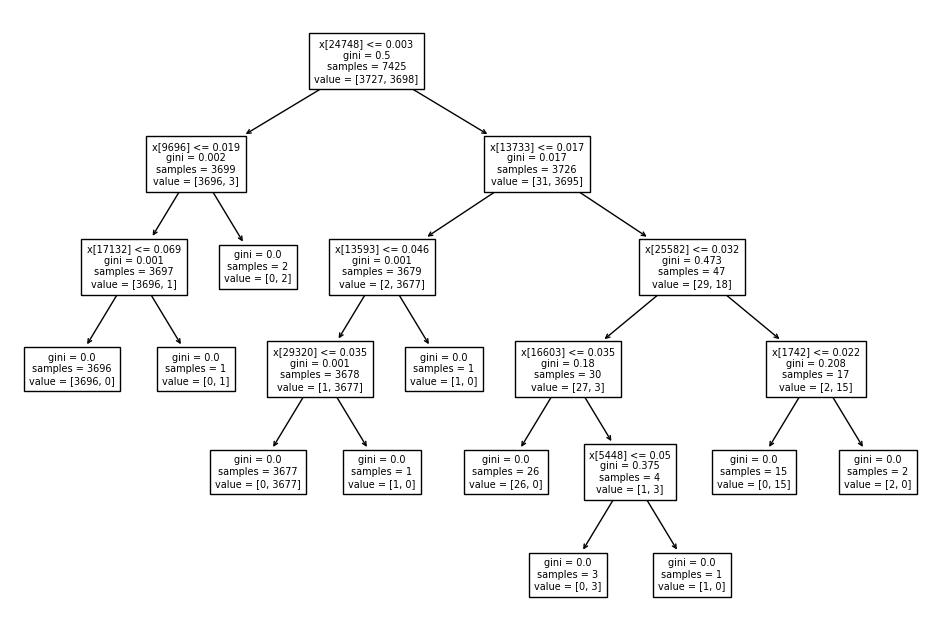

In [52]:
plt.figure(figsize= (12, 8))
plot_tree(dt, fontsize=7);    # Decision tree takes only important features and discards rest

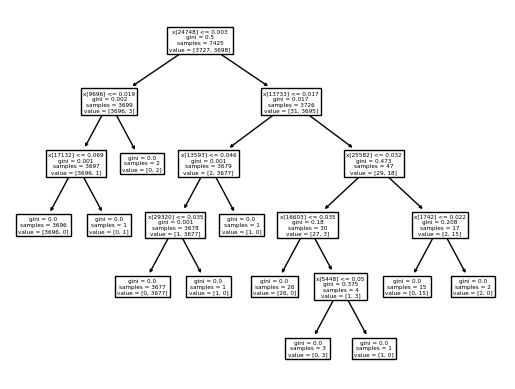

In [53]:
plot_tree(dt);

#### Performance Evaluation

In [58]:
# predict the result on test data
y_pred = dt.predict(x_test)

In [59]:
# algorithm predicted data
y_pred

array(['Fake', 'Fake', 'Fake', ..., 'Fake', 'Fake', 'Fake'], dtype=object)

In [60]:
len(y_pred)

2475

In [61]:
y_test

6688    Fake
5766    Fake
6335    Fake
5857    Real
7323    Real
        ... 
14      Real
5489    Real
6953    Fake
6780    Fake
6727    Fake
Name: label, Length: 2475, dtype: object

In [64]:
# import the class
from sklearn.metrics import ConfusionMatrixDisplay

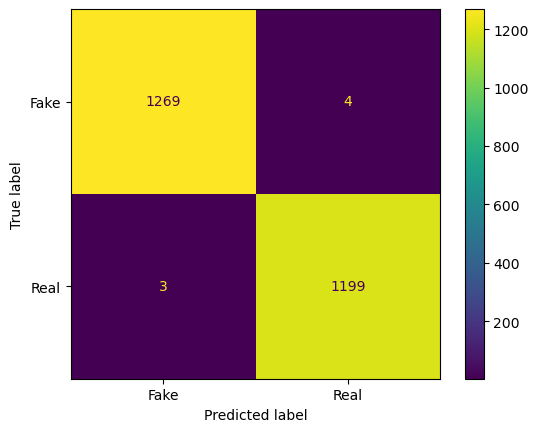

In [65]:
# show the matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [67]:
(1269 + 1199) / 2475                    # output is the mismatched entries

0.9971717171717172

In [69]:
# fake class
(1269 / 1273)    # recall

0.9968578161822467

In [71]:
# Real class
1199 / 1202     # total entries / matched entries

0.997504159733777

#### Prediction on unseen new news

In [87]:
f = open('sample_news.txt', encoding = 'utf-8')

In [88]:
news = f.readlines()

In [89]:
news

['" Donald Trump’s ‘Charity’ Foundation Is About To Be Shut The F**k Down NATIONWIDE Things really aren t looking too great for Donald Trump s charity foundation. With recent developments prohibiting the Trump Foundation from soliciting funds in New York state, it s now looking like a good majority of states may be following suit.The Trump Foundation has also been being looked at by the Attorney General for how it is getting and spending funds, especially after what happen with veterans organizations earlier this year.According to The Daily Beast: To make matters worse for the Trump Foundation, the probe may not be limited to New York: Charity experts and lawyers tell The Daily Beast that the attorneys general of other states may soon get involved in a long, drawn-out process.All major charities are required to register with 41 different states across the nation in order to individually request permission to fundraise. When Trump raised money for veterans, he may have broken the rules 

In [90]:
tfidf.transform(news)

<3x33562 sparse matrix of type '<class 'numpy.float64'>'
	with 325 stored elements in Compressed Sparse Row format>

In [93]:
dt.predict(tfidf.transform(news))

array(['Fake', 'Real', 'Fake'], dtype=object)

In [94]:
len(news)

3